In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [22]:
df = pd.read_csv("../../datasets/emip-enhanced/data/87_rawdata.tsv", sep="\t", comment="#")
df = df.replace({0: np.nan})
df.fillna(method="ffill")

,Unnamed: 0,Time,Type,Trial,L Raw X [px],L Raw Y [px],R Raw X [px],R Raw Y [px],L Dia X [px],L Dia Y [px],...,L GVEC X,L GVEC Y,L GVEC Z,R GVEC X,R GVEC Y,R GVEC Z,Frame,Aux1,status,trial_number
0,NaN,6.787535e+09,SMP,1.0,780.55,351.49,523.99,356.25,14.15,14.15,...,0.10,0.08,-0.99,0.17,0.10,-0.98,NaN,NaN,NaN,NaN
1,1.0,6.787539e+09,SMP,1.0,780.58,351.45,523.97,356.21,14.21,14.21,...,0.10,0.08,-0.99,0.17,0.10,-0.98,NaN,NaN,NaN,NaN
2,2.0,6.787543e+09,SMP,1.0,780.56,351.45,523.98,356.19,14.18,14.18,...,0.10,0.08,-0.99,0.17,0.10,-0.98,-1.0,NaN,NaN,NaN
3,3.0,6.787547e+09,SMP,1.0,780.59,351.42,524.01,356.13,14.13,14.13,...,0.10,0.08,-0.99,0.17,0.10,-0.98,-1.0,NaN,NaN,NaN
4,4.0,6.787551e+09,SMP,1.0,780.58,351.40,524.05,356.16,14.06,14.06,...,0.10,0.08,-0.99,0.17,0.10,-0.98,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49127,62174.0,7.335905e+09,SMP,1.0,817.57,49.91,540.34,55.01,14.58,14.58,...,-0.18,0.03,-0.98,-0.15,0.06,-0.99,-1.0,NaN,READING,2.0
49128,62175.0,7.335909e+09,SMP,1.0,817.60,49.81,540.27,54.93,14.64,14.64,...,-0.18,0.03,-0.98,-0.15,0.06,-0.99,-1.0,NaN,READING,2.0
49129,62176.0,7.335913e+09,SMP,1.0,817.56,49.74,540.23,54.87,14.61,14.61,...,-0.18,0.03,-0.98,-0.15,0.06,-0.99,-1.0,NaN,READING,2.0
49130,62177.0,7.335917e+09,SMP,1.0,817.49,49.61,540.15,54.72,14.67,14.67,...,-0.18,0.03,-0.98,-0.14,0.07,-0.99,-1.0,NaN,READING,2.0


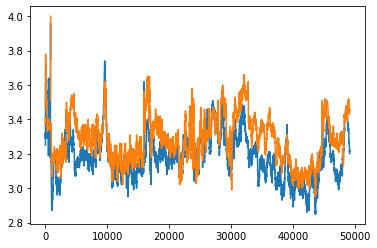

In [23]:
plt.plot(df["R Mapped Diameter [mm]"])
plt.plot(df["L Mapped Diameter [mm]"])
plt.show()